# --------------------- English Premier League(2020 - 2021) Analysis --------------------


<img src = "premier_league_rebrands_designstudio_01.jpg" width = "1000px">

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv("EPL_20_21_dataset.csv")
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [3]:
df.shape

(532, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [5]:
df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


# Correlation Matrix

<AxesSubplot:>

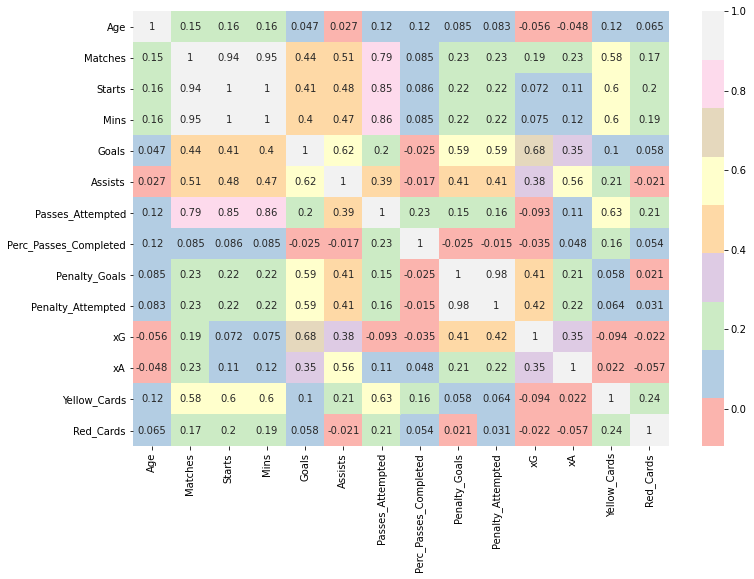

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='Pastel1')

In [9]:
# Create new coloums

df['Mins_Per_Match'] = (df['Mins'] / df['Matches']).astype(int)
df['Goals_Per_Match'] = (df['Goals'] / df['Matches']).astype(float)
df['Assist_Per_Match'] = (df['Assists'] / df['Matches']).astype(float)
df['Goal_involvement'] = (df['Goals']+ df['Assists']).astype(int)
df['expected_goal_inv'] = (df['xG']+df['xA'])*(df['Mins']/90).astype(float)
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_Per_Match,Goals_Per_Match,Assist_Per_Match,Goal_involvement,expected_goal_inv
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,...,1,0.21,0.24,2,0,80,0.166667,0.138889,11,14.450000
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,...,0,0.00,0.00,2,0,88,0.000000,0.000000,0,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,0,0.41,0.21,2,0,74,0.171429,0.228571,14,17.924889
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,...,0,0.10,0.11,3,0,84,0.111111,0.185185,8,5.334000
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,...,0,0.06,0.12,3,0,74,0.031250,0.062500,3,4.746000


In [10]:
# Total Goals

Total_Goals = df['Goals'].sum()
Total_Goals

986

In [11]:
# Total Assists

Total_Assists = df['Assists'].sum()
Total_Assists

685

In [12]:
# Total Panalty Goals

Total_Panalty_goals = df['Penalty_Goals'].sum()
Total_Panalty_goals

102

In [13]:
# Total Panalty Attemps

Total_Panalty_Attemps = df['Penalty_Attempted'].sum()
Total_Panalty_Attemps

125

In [14]:
# Total Panalty Miss

Total_Panalty_Miss = Total_Panalty_Attemps - Total_Panalty_goals
Total_Panalty_Miss

23

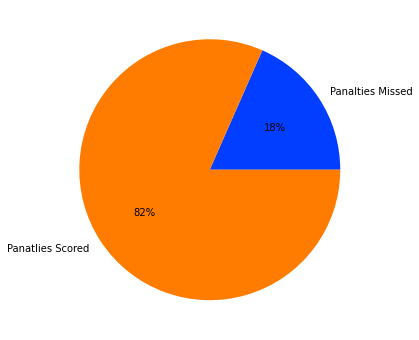

In [15]:
# Pie Chart Panalty miss vs Score

plt.figure(figsize=(13,6))
data = [Total_Panalty_Miss,Total_Panalty_goals]
labels = ['Panalties Missed','Panatlies Scored']
colors = sns.color_palette('bright')[0:2]
plt.pie(data,labels = labels,colors = colors,autopct='%.0f%%')
plt.show()

# Goal Involvement Efficiency

In [16]:
name = df[['Name','Club', 'Goals', 'Assists', 'Goal_involvement', 'expected_goal_inv' ]].sort_values(by="Goal_involvement", ascending = False)[:10]
name.head()

,Name,Club,Goals,Assists,Goal_involvement,expected_goal_inv
162,Harry Kane,Tottenham Hotspur,23,14,37,28.080444
51,Bruno Fernandes,Manchester United,18,12,30,26.513667
81,Mohamed Salah,Liverpool FC,22,5,27,27.018000
161,Son Heung-min,Tottenham Hotspur,17,10,27,19.376000
110,Jamie Vardy,Leicester City,15,9,24,24.613333


In [17]:
df[['Name', 'xG', 'xA', 'Goal_involvement', 'expected_goal_inv']].sort_values(by="expected_goal_inv", ascending = False)[:10].head()

,Name,xG,xA,Goal_involvement,expected_goal_inv
162,Harry Kane,0.60,0.22,37,28.080444
81,Mohamed Salah,0.61,0.18,27,27.018000
51,Bruno Fernandes,0.45,0.32,30,26.513667
110,Jamie Vardy,0.62,0.16,24,24.613333
214,Patrick Bamford,0.51,0.12,24,21.350000


In [18]:
# Unique Position

df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [19]:
# Total FW Players

df[df['Position'] =='FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_Per_Match,Goals_Per_Match,Assist_Per_Match,Goal_involvement,expected_goal_inv
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,...,0,0.41,0.21,2,0,74,0.171429,0.228571,14,17.924889
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,...,0,0.56,0.07,0,0,47,0.272727,0.045455,7,7.280000
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,...,0,0.58,0.09,1,0,44,0.235294,0.000000,4,5.568444
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,...,0,0.00,0.00,0,0,60,0.000000,0.000000,0,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,...,1,0.43,0.17,4,0,81,0.322581,0.225806,17,16.906667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,...,0,0.17,0.13,2,0,50,0.040000,0.040000,2,4.230000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,...,0,0.21,0.07,2,0,57,0.043478,0.000000,1,4.119111
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,...,0,0.14,0.13,1,0,41,0.000000,0.000000,0,3.384000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,...,2,0.33,0.07,1,0,45,0.187500,0.000000,3,3.266667


In [20]:
# Players From different nation

# np.size(df['Nationality'].unique())
len(df['Nationality'].unique())

59

<AxesSubplot:xlabel='Nationality'>

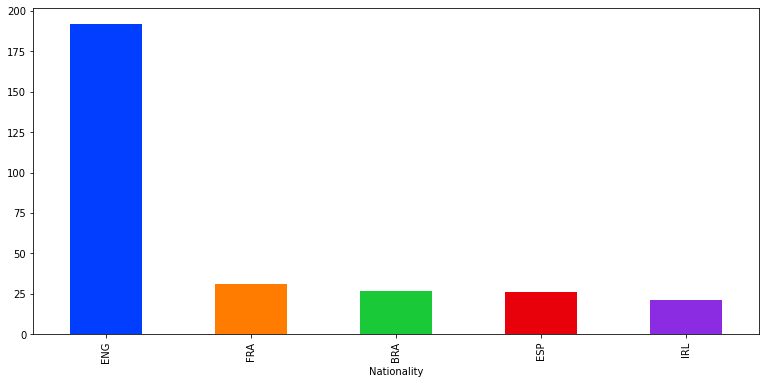

In [21]:
# Maximum Players from Which Country

nationality = df.groupby('Nationality').size().sort_values(ascending = False)
nationality.head().plot(kind ='bar',figsize=(13,6),color = sns.color_palette("bright"))

In [22]:
# Clubs with maximum players
df['Club'].value_counts()

West Bromwich Albion       30
Southampton                29
Manchester United          29
Arsenal                    29
Everton                    29
Fulham                     28
Liverpool FC               28
Brighton                   27
Leicester City             27
Chelsea                    27
Sheffield United           27
Newcastle United           27
Wolverhampton Wanderers    27
Burnley                    25
Manchester City            24
Crystal Palace             24
Aston Villa                24
Tottenham Hotspur          24
West Ham United            24
Leeds United               23
Name: Club, dtype: int64

<AxesSubplot:title={'center':'Clubs with maximum players'}>

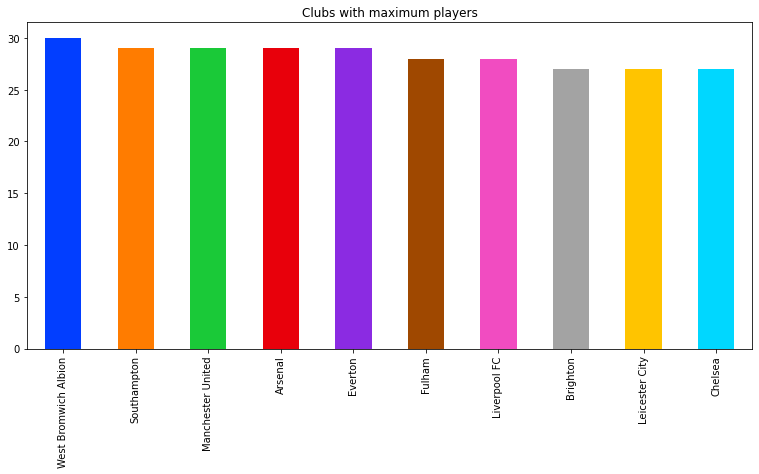

In [23]:
# Clubs with maximum players
plt.title("Clubs with maximum players")
df['Club'].value_counts().nlargest(10).plot(kind='bar',figsize=(13,6),color = sns.color_palette("bright"))

<AxesSubplot:title={'center':'Clubs with minimum players'}>

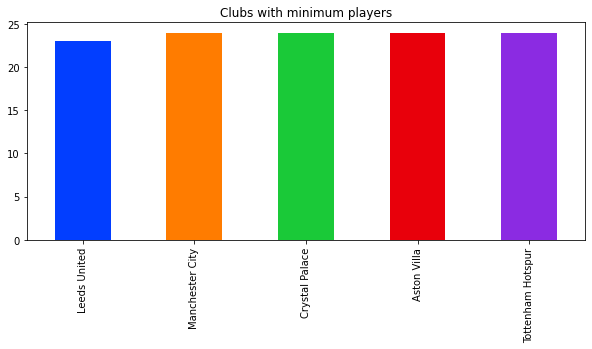

In [24]:
# Clubs with minimum players
plt.title("Clubs with minimum players")
df['Club'].value_counts().nsmallest(5).plot(kind='bar',figsize=(10,4),color = sns.color_palette("bright"))

# Age Distribution in the league

In [25]:
df[df['Age']==df['Age'].min()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_Per_Match,Goals_Per_Match,Assist_Per_Match,Goal_involvement,expected_goal_inv
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,...,0,0.00,0.0,0,0,5,0.0,0.0,0,0.000000
182,Dane Scarlett,Tottenham Hotspur,ENG,FW,16,1,0,1,0,0,...,0,0.00,0.0,0,0,1,0.0,0.0,0,0.000000
284,Carney Chukwuemeka,Aston Villa,ENG,"FW,MF",16,2,0,20,0,0,...,0,0.29,0.0,0,0,10,0.0,0.0,0,0.064444
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,...,0,1.16,0.0,0,0,11,0.0,0.0,0,0.141778


In [26]:
df[df['Age']==df['Age'].max()]

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_Per_Match,Goals_Per_Match,Assist_Per_Match,Goal_involvement,expected_goal_inv
22,Willy Caballero,Chelsea,ARG,GK,38,1,1,90,0,0,...,0,0.0,0.0,0,0,90,0.0,0.0,0,0.0


In [27]:
## Players based on age group

age_under_20 = df[df['Age']<=20]
age_20_25 = df[(df['Age']>20) & (df['Age']<=25)]
age_25_30 = df[(df['Age'] > 25) & (df['Age'] <= 30)]
age_bove_30 = df[df['Age'] > 30]


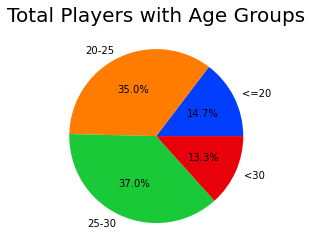

In [28]:
age_data = [age_under_20['Name'].count(),age_20_25['Name'].count(),age_25_30['Name'].count(),age_bove_30['Name'].count()]
labels = ["<=20", "20-25", "25-30", "<30"]
colors = sns.color_palette("bright")

plt.title('Total Players with Age Groups', fontsize = 20)
plt.pie(age_data, labels = labels,colors = colors,autopct="%.1f%%")
plt.show()

<AxesSubplot:title={'center':'Total under 20 players in each club'}>

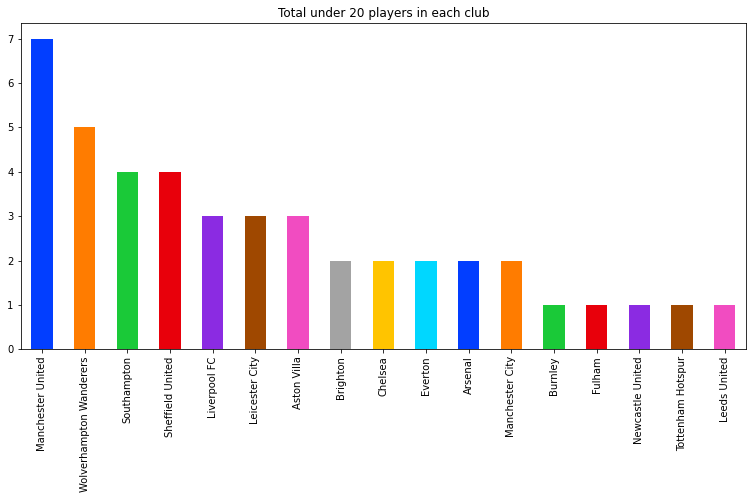

In [29]:
# Total under 20 players in each club
players_under_20 = df[df['Age'] <20]
plt.title("Total under 20 players in each club")
players_under_20['Club'].value_counts().plot(kind='bar',figsize=(13,6),color = sns.color_palette("bright"))

In [30]:
#  Under 20 players in Manchester United
man_u_under_20 = df[(df['Age']<20) & (df['Club'] =='Manchester United') ]
man_u_under_20

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_Per_Match,Goals_Per_Match,Assist_Per_Match,Goal_involvement,expected_goal_inv
61,Mason Greenwood,Manchester United,ENG,FW,18,31,21,1822,7,2,...,0,0.37,0.09,2,0,58,0.225806,0.064516,9,9.312444
72,Brandon Williams,Manchester United,ENG,DF,19,4,2,188,0,0,...,0,0.05,0.01,0,0,47,0.000000,0.000000,0,0.125333
73,Amad Diallo,Manchester United,CIV,FW,18,3,2,166,0,1,...,0,0.02,0.26,0,0,55,0.000000,0.333333,1,0.516444
74,Anthony Elanga,Manchester United,SWE,FW,18,2,2,155,1,0,...,0,0.16,0.02,0,0,77,0.500000,0.000000,1,0.310000
76,Shola Shoretire,Manchester United,ENG,FW,16,2,0,11,0,0,...,0,0.00,0.00,0,0,5,0.000000,0.000000,0,0.000000
78,Hannibal Mejbri,Manchester United,FRA,MF,17,1,0,9,0,0,...,0,0.00,0.00,0,0,9,0.000000,0.000000,0,0.000000
79,William Thomas Fish,Manchester United,ENG,DF,17,1,0,1,0,0,...,0,0.00,0.00,0,0,1,0.000000,0.000000,0,0.000000


In [31]:
# Under 20 players in Chelsea
chelsea_under_20 = df[(df['Age']<20) & (df['Club'] =='Chelsea') ]
chelsea_under_20


,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,...,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,Mins_Per_Match,Goals_Per_Match,Assist_Per_Match,Goal_involvement,expected_goal_inv
18,Callum Hudson-Odoi,Chelsea,ENG,"FW,DF",19,23,10,1059,2,3,...,0,0.12,0.26,0,0,46,0.086957,0.130435,5,4.471333
21,Billy Gilmour,Chelsea,SCO,MF,19,5,3,261,0,0,...,0,0.01,0.04,0,0,52,0.000000,0.000000,0,0.145000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Chelsea'),
  Text(1, 0, 'Manchester City'),
  Text(2, 0, 'Manchester United'),
  Text(3, 0, 'Liverpool FC'),
  Text(4, 0, 'Leicester City'),
  Text(5, 0, 'West Ham United'),
  Text(6, 0, 'Tottenham Hotspur'),
  Text(7, 0, 'Arsenal'),
  Text(8, 0, 'Leeds United'),
  Text(9, 0, 'Everton'),
  Text(10, 0, 'Aston Villa'),
  Text(11, 0, 'Newcastle United'),
  Text(12, 0, 'Wolverhampton Wanderers'),
  Text(13, 0, 'Crystal Palace'),
  Text(14, 0, 'Southampton'),
  Text(15, 0, 'Brighton'),
  Text(16, 0, 'Burnley'),
  Text(17, 0, 'Fulham'),
  Text(18, 0, 'West Bromwich Albion'),
  Text(19, 0, 'Sheffield United')])

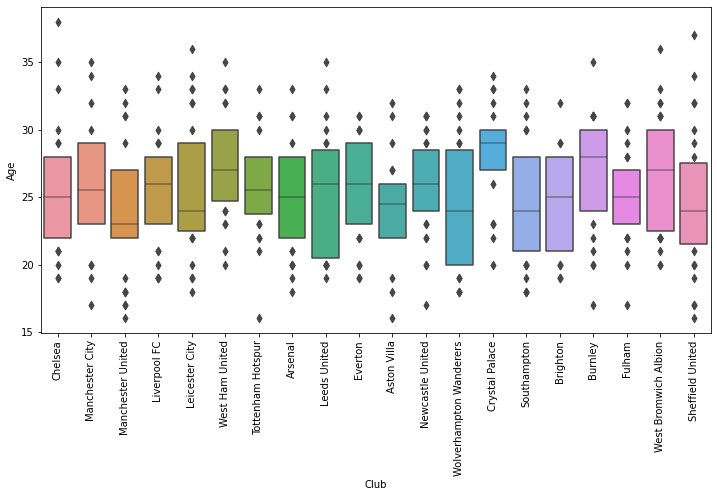

In [32]:
# Average age of players in each club

plt.figure(figsize=(12,6))
sns.boxenplot(x='Club',y='Age',data = df)
plt.xticks(rotation=90)

In [33]:
# Most avarage age of the team

num_player = df.groupby('Club').size()
data = (df.groupby('Club')['Age'].sum())/ num_player
data.sort_values(ascending = False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

In [34]:
# # Total assists from each club
Assist_by_club = pd.DataFrame(df.groupby('Club',as_index=False)['Assists'].sum())
Assist_by_club

,Club,Assists
0,Arsenal,38
1,Aston Villa,38
2,Brighton,24
3,Burnley,20
4,Chelsea,38
5,Crystal Palace,29
6,Everton,32
7,Fulham,18
8,Leeds United,45
9,Leicester City,45


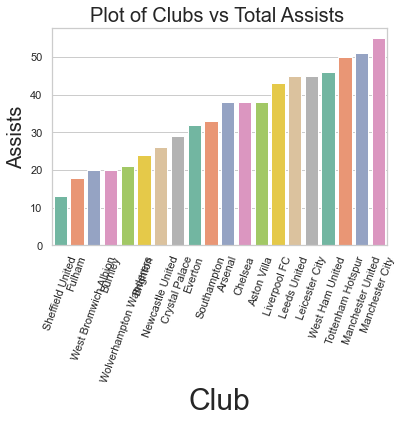

In [35]:
# Total assists from each club

Assists_by_clubs = pd.DataFrame(df.groupby('Club', as_index=False)["Assists"].sum())
sns.set_theme(style='whitegrid', color_codes=True)
ax = sns.barplot(x='Club', y='Assists', data=Assists_by_clubs.sort_values(by="Assists") , palette="Set2")
ax.set_xlabel("Club", fontsize=30)
ax.set_ylabel("Assists", fontsize=20)
plt.xticks(rotation=70)
plt.rcParams["figure.figsize"] = (10,12)
plt.title("Plot of Clubs vs Total Assists ", fontsize=20)
plt.show()

In [36]:
# Top 10 assisters
top_assisters = df[['Name','Club','Assists','Matches']].nlargest(10,columns = 'Assists')
top_assisters

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


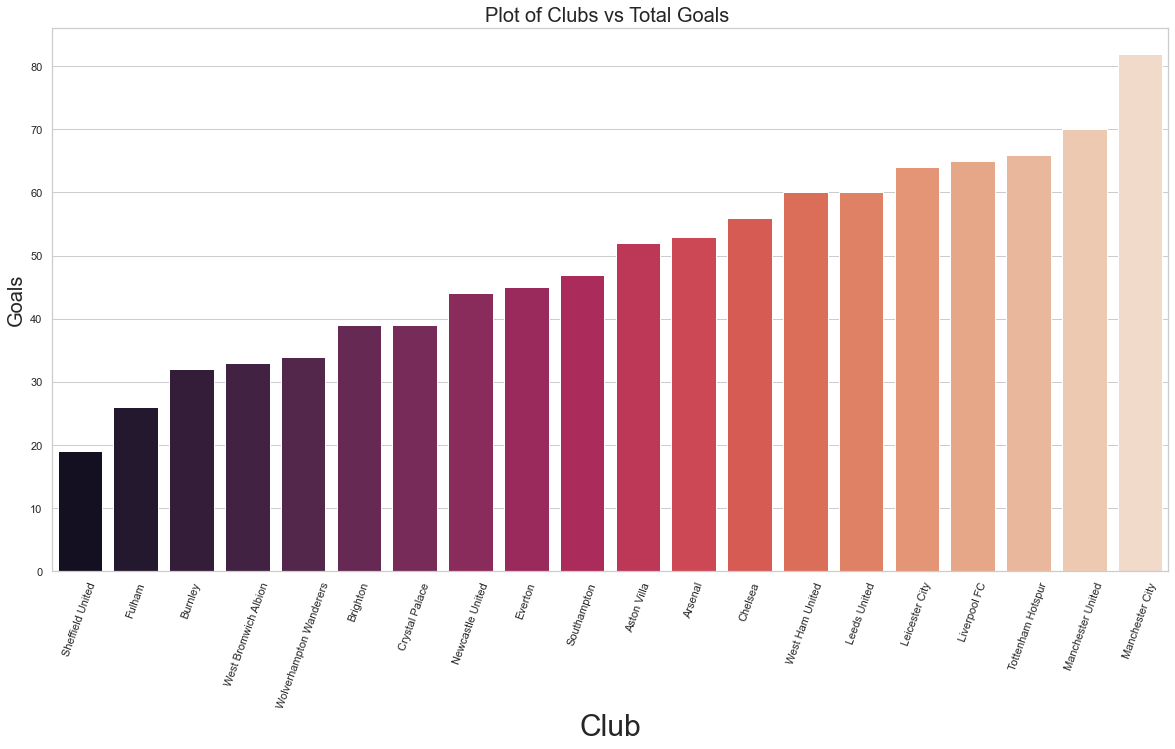

In [56]:
# Total Goals from each club

Assists_by_clubs = pd.DataFrame(df.groupby('Club', as_index=False)["Goals"].sum())
sns.set_theme(style='whitegrid', color_codes=True)
ax = sns.barplot(x='Club', y='Goals', data=Assists_by_clubs.sort_values(by="Goals") , palette="rocket")
ax.set_xlabel("Club", fontsize=30)
ax.set_ylabel("Goals", fontsize=20)
plt.xticks(rotation=70)
plt.rcParams["figure.figsize"] = (12,6)
plt.title("Plot of Clubs vs Total Goals ", fontsize=20)
plt.show()

In [38]:
# Most Goals by players

top_10_goals_scorer = df[["Name", "Club", "Goals", "Matches"]].nlargest(10, columns='Goals')
top_10_goals_scorer

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [39]:
# Defender Goalscorer
df[['Name', 'Club', 'Position', 'Goals', 'Assists']][df['Position']=='DF'].sort_values(by='Goals', ascending = False)[:10]

,Name,Club,Position,Goals,Assists
397,Lewis Dunk,Brighton,DF,5,0
9,Kurt Zouma,Chelsea,DF,5,0
38,John Stones,Manchester City,DF,4,0
3,Ben Chilwell,Chelsea,DF,3,5
142,Angelo Ogbonna,West Ham United,DF,3,0
144,Craig Dawson,West Ham United,DF,3,0
235,Michael Keane,Everton,DF,3,1
479,Kyle Bartley,West Bromwich Albion,DF,3,1
373,Jannik Vestergaard,Southampton,DF,3,0
323,Romain Saïss,Wolverhampton Wanderers,DF,3,0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lewis Dunk'),
  Text(1, 0, 'Kurt Zouma'),
  Text(2, 0, 'John Stones'),
  Text(3, 0, 'Ben Chilwell'),
  Text(4, 0, 'Angelo Ogbonna'),
  Text(5, 0, 'Craig Dawson'),
  Text(6, 0, 'Michael Keane'),
  Text(7, 0, 'Kyle Bartley'),
  Text(8, 0, 'Jannik Vestergaard'),
  Text(9, 0, 'Romain Saïss')])

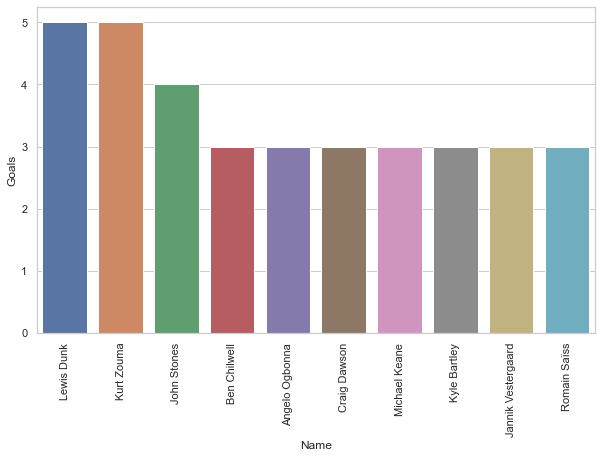

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x='Name', y='Goals', data=df[df['Position']=='DF'].sort_values(by='Goals', ascending = False)[:10])
plt.xticks(rotation=90)

In [41]:
# Goals per Match 
top_10_goals_per_match = df[["Name","Goals_Per_Match", "Matches", "Goals"]].nlargest(n=10, columns="Goals_Per_Match")
top_10_goals_per_match

,Name,Goals_Per_Match,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


In [42]:
# Most Passes

most_pass_att = df[['Name','Club','Passes_Attempted','Position']].nlargest(10, columns = 'Passes_Attempted')
most_pass_att

,Name,Club,Passes_Attempted,Position
80,Andrew Robertson,Liverpool FC,3214,DF
82,Trent Alexander-Arnold,Liverpool FC,2941,DF
29,Rodri,Manchester City,2728,MF
159,Pierre Højbjerg,Tottenham Hotspur,2687,MF
28,Rúben Dias,Manchester City,2671,DF
213,Luke Ayling,Leeds United,2661,DF
366,James Ward-Prowse,Southampton,2619,MF
109,Youri Tielemans,Leicester City,2559,MF
51,Bruno Fernandes,Manchester United,2283,MF
212,Stuart Dallas,Leeds United,2212,"DF,MF"


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Andrew Robertson'),
  Text(1, 0, 'Trent Alexander-Arnold'),
  Text(2, 0, 'Rodri'),
  Text(3, 0, 'Pierre Højbjerg'),
  Text(4, 0, 'Rúben Dias'),
  Text(5, 0, 'Luke Ayling'),
  Text(6, 0, 'James Ward-Prowse'),
  Text(7, 0, 'Youri Tielemans'),
  Text(8, 0, 'Bruno Fernandes'),
  Text(9, 0, 'Stuart Dallas')])

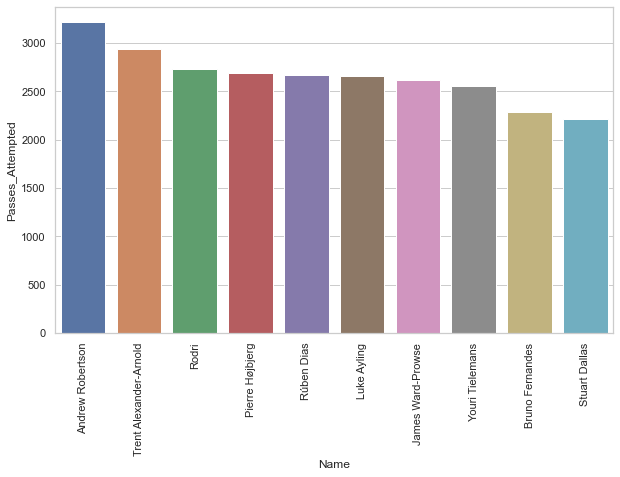

In [43]:
plt.figure(figsize=(10,6))
ax =sns.barplot(x='Name', y='Passes_Attempted', data=most_pass_att)
plt.xticks(rotation=90)

In [44]:
# Most Efficient Passers

pass_acc = df[(df['Position'] != 'GK') & (df['Position'] != 'DF') & (df['Passes_Attempted']>= 1000)]
pass_acc[['Name', 'Club', 'Passes_Attempted', 'Perc_Passes_Completed']].nlargest(10, 'Perc_Passes_Completed')

,Name,Club,Passes_Attempted,Perc_Passes_Completed
195,Mohamed Elneny,Arsenal,1003,93.4
83,Georginio Wijnaldum,Liverpool FC,1747,93.3
29,Rodri,Manchester City,2728,91.5
87,Fabinho,Liverpool FC,2049,91.1
10,Mateo Kovačić,Chelsea,1737,91.0
33,İlkay Gündoğan,Manchester City,1707,91.0
185,Granit Xhaka,Arsenal,2164,89.9
32,Bernardo Silva,Manchester City,1427,89.7
7,Jorginho,Chelsea,1739,89.5
88,Thiago Alcántara,Liverpool FC,1674,89.5


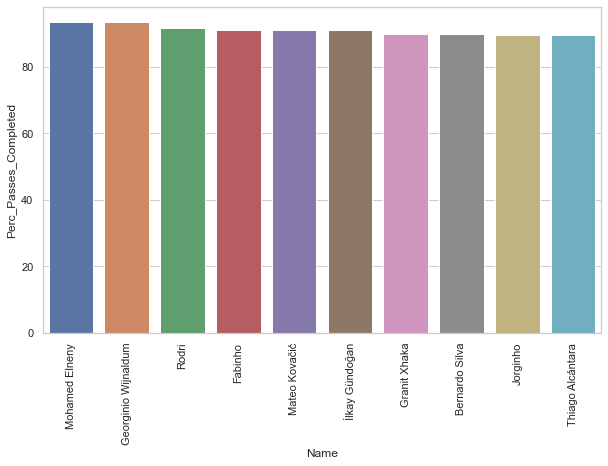

In [54]:
plt.figure(figsize=(10,6))
ax =sns.barplot(x='Name', y='Perc_Passes_Completed', data=pass_acc.nlargest(10, 'Perc_Passes_Completed'))
plt.xticks(rotation=90)
plt.show()

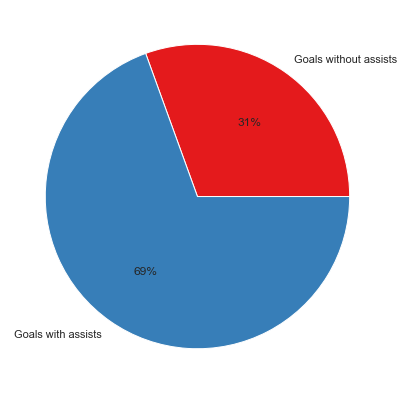

In [46]:
# Pie Chart - Goals with assist and without assists
plt.figure(figsize=(14,7))
assists = df["Assists"].sum()
data = [Total_Goals - assists, assists]
labels = ['Goals without assists', "Goals with assists"]
color = sns.color_palette("Set1")
plt.pie(data, labels = labels, colors=color, autopct="%.0f%%")
plt.show()

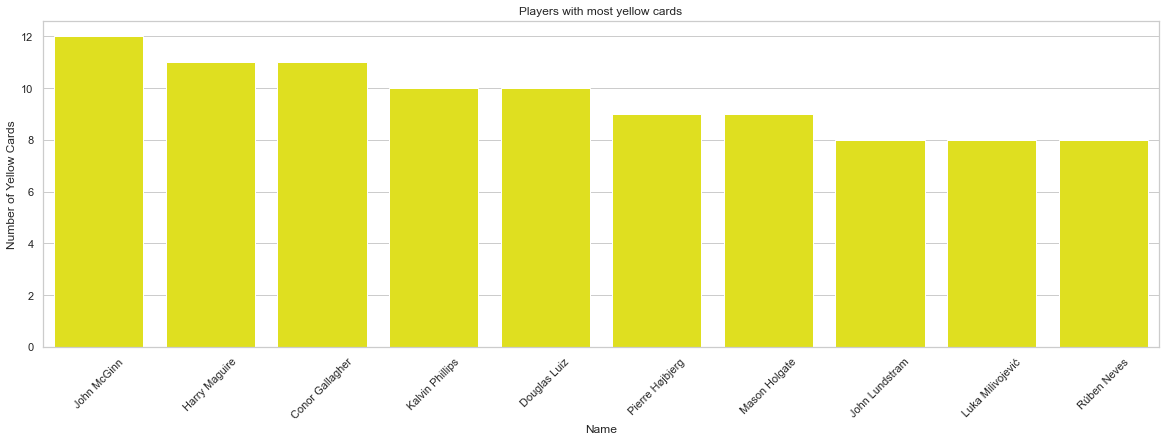

In [47]:
# Top 10 players with most yellow cards

yellow_card = df.sort_values(by='Yellow_Cards',ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Players with most yellow cards')
c = sns.barplot(x=yellow_card['Name'], y=yellow_card['Yellow_Cards'], label="Players", color='yellow')
plt.ylabel('Number of Yellow Cards')
c.set_xticklabels(c.get_xticklabels(), rotation=45)
plt.show()

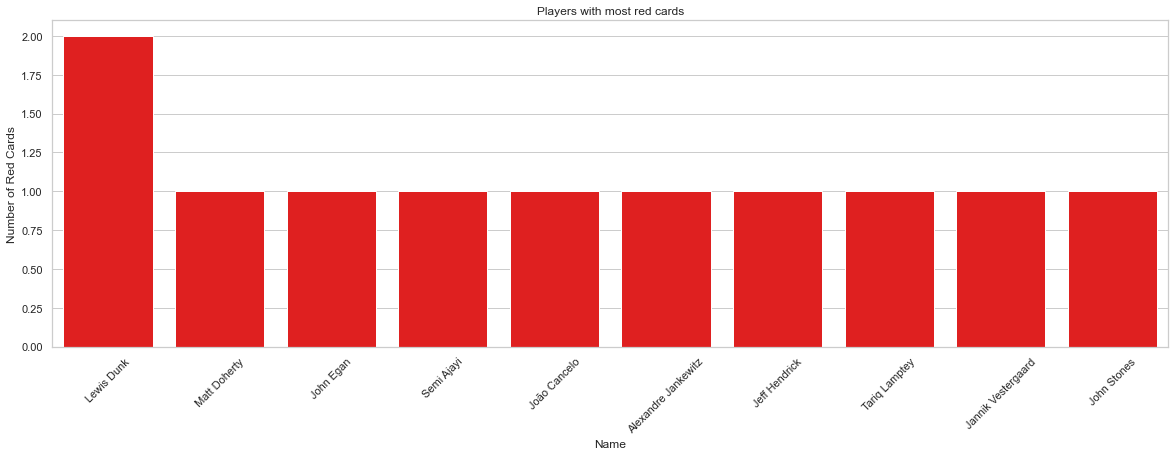

In [48]:
# Top 10 players with most red cards

red_card = df.sort_values(by='Red_Cards',ascending=False)[:10]
plt.figure(figsize=(20,6))
plt.title('Players with most red cards')
c = sns.barplot(x=red_card['Name'], y=red_card['Red_Cards'], label="Players", color='red')
plt.ylabel('Number of Red Cards')
c.set_xticklabels(c.get_xticklabels(), rotation=45)
plt.show()

# Most Agressive Team and Player

In [49]:
df['Total_Cards'] = df['Yellow_Cards']+df['Red_Cards']
df[['Name', 'Club', 'Yellow_Cards', 'Red_Cards', 'Total_Cards']].nlargest(10, 'Total_Cards')

,Name,Club,Yellow_Cards,Red_Cards,Total_Cards
266,John McGinn,Aston Villa,12,0,12
53,Harry Maguire,Manchester United,11,0,11
270,Douglas Luiz,Aston Villa,10,1,11
480,Conor Gallagher,West Bromwich Albion,11,0,11
218,Kalvin Phillips,Leeds United,10,0,10
159,Pierre Højbjerg,Tottenham Hotspur,9,0,9
242,Mason Holgate,Everton,9,0,9
272,Matty Cash,Aston Villa,8,1,9
346,Luka Milivojević,Crystal Palace,8,1,9
396,Yves Bissouma,Brighton,8,1,9


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'John McGinn'),
  Text(1, 0, 'Harry Maguire'),
  Text(2, 0, 'Douglas Luiz'),
  Text(3, 0, 'Conor Gallagher'),
  Text(4, 0, 'Kalvin Phillips'),
  Text(5, 0, 'Pierre Højbjerg'),
  Text(6, 0, 'Mason Holgate'),
  Text(7, 0, 'Matty Cash'),
  Text(8, 0, 'Luka Milivojević'),
  Text(9, 0, 'Yves Bissouma')])

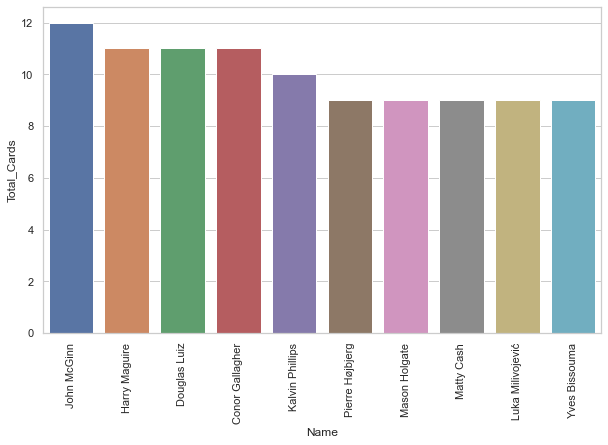

In [50]:
plt.figure(figsize=(10,6))
ax =sns.barplot(x='Name', y='Total_Cards', data=df.nlargest(10, 'Total_Cards'))
plt.xticks(rotation=90)

In [51]:
team_cards=df.groupby(by='Club', as_index=False)['Total_Cards'].sum().sort_values(by='Total_Cards',ascending=False)
team_cards

,Club,Total_Cards
14,Sheffield United,76
1,Aston Villa,75
7,Fulham,70
13,Newcastle United,68
12,Manchester United,65
8,Leeds United,62
6,Everton,61
9,Leicester City,61
16,Tottenham Hotspur,59
5,Crystal Palace,58


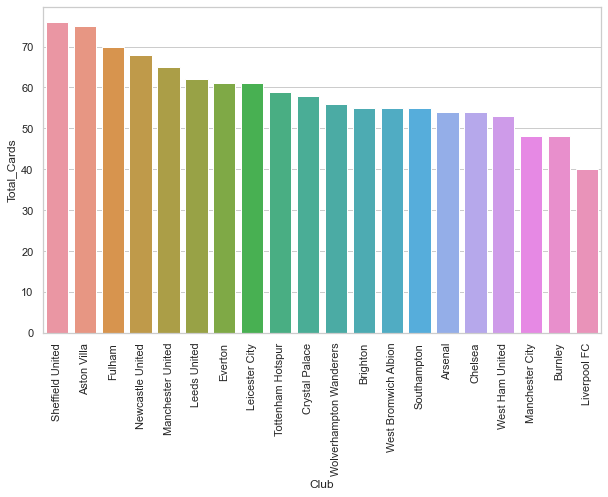

In [53]:
plt.figure(figsize=(10,6))
ax =sns.barplot(x='Club', y='Total_Cards', data=team_cards)
plt.xticks(rotation=90)
plt.show()